## import libraries and collect data

In [45]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
iris = load_iris()

## View and analyze data

In [2]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["target"] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
df["target_name"] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [13]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [14]:
df0 = df[df["target"] == 0]
df1 = df[df["target"] == 1]
df2 = df[df["target"] == 2]

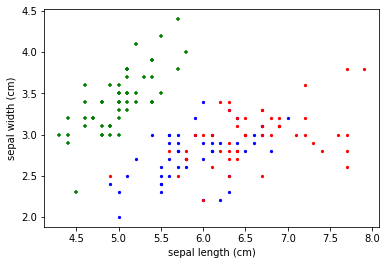

In [38]:
ax = df0.plot.scatter("sepal length (cm)", "sepal width (cm)", marker='+', color="green")
ax = df1.plot.scatter("sepal length (cm)", "sepal width (cm)", marker='.', color="blue", ax=ax)
ax = df2.plot.scatter("sepal length (cm)", "sepal width (cm)", marker='.', color="red", ax=ax)

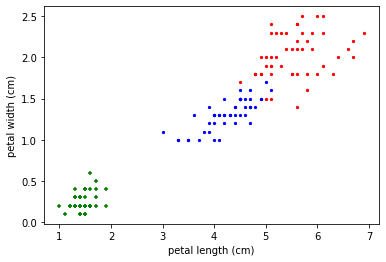

In [39]:
ax = df0.plot.scatter("petal length (cm)", "petal width (cm)", marker='+', color="green")
ax = df1.plot.scatter("petal length (cm)", "petal width (cm)", marker='.', color="blue", ax=ax)
ax = df2.plot.scatter("petal length (cm)", "petal width (cm)", marker='.', color="red", ax=ax)

## Create model

In [41]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [42]:
X = df.drop(["target", "target_name"], axis="columns")
Y = df['target']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [43]:
len(X_train)

120

In [44]:
len(X_test)

30

In [46]:
mymodel = SVC()
mymodel.fit(X_train, Y_train)

SVC()

## Evaluate model

In [48]:
mymodel.predict(X_test[:5])

array([2, 2, 1, 1, 2])

In [49]:
Y_test[:5]

121    2
100    2
57     1
84     1
124    2
Name: target, dtype: int32

In [50]:
mymodel.score(X_test, Y_test)

0.9666666666666667